# Mathematically modelling a pure credit economy according to Steve Keen

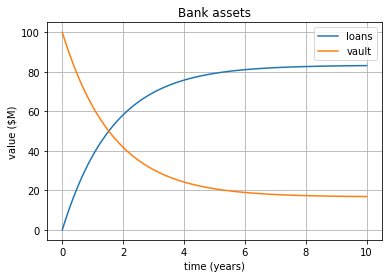

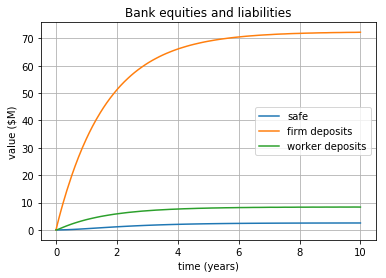

After 10 years, in $M:
vault = 16.9
safe = 2.5
firm deposits = 72.2
worker deposits = 8.3
loans = 83.1

During year 10, in $M:
lend = 8.475
repay = 8.305
cons_w = 216.714
cons_b = 2.529
interests to bank = 4.153
interests to workers = 0.167
interests to firms = 1.444
wages = 216.558
increase in bank = 0.013
increase in firms = 0.146
increase in workers = 0.011
increase in loans = 0.170
increase in vault = -0.170
profits for bank = 0.013
profits for firms = -0.024
profits for workers = 0.011
total consumption = 219.243
part of wages in total consumption = 98.78%
total consumption minus wages = 2.685


In [21]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def economy_derivative(t, economy):
    lend = economy[0]
    repay = economy[1]
    cons_w = economy[2]
    cons_b = economy[3]
    interests_b = economy[4]
    interests_w = economy[5]
    interests_f = economy[6]
    wages = economy[7]
    bank = economy[8]
    firms = economy[9]
    workers = economy[10]
    loans = economy[11]
    vault = economy[12]

    lend_r = 0.5
    repay_r = 0.1
    cons_w_r = 26.0
    cons_b_r = 1.0
    interests_b_r = 0.05
    interests_d_r = 0.02
    wages_r = 3.0
    
    d_lend = vault * lend_r
    d_repay = loans * repay_r
    d_cons_w = workers * cons_w_r
    d_cons_b = bank * cons_b_r
    d_interests_b = loans * interests_b_r
    d_interests_w = workers * interests_d_r
    d_interests_f = firms * interests_d_r
    d_wages = firms * wages_r
    
    d_bank = d_interests_b - d_interests_w - d_interests_f - d_cons_b
    d_firms = d_lend + d_cons_w + d_cons_b + d_interests_f - (d_wages + d_interests_b + d_repay)
    d_workers = d_wages + d_interests_w - d_cons_w
    d_loans = d_lend - d_repay
    d_vault = -d_loans
    
    return [d_lend, d_repay, d_cons_w, d_cons_b, d_interests_b, d_interests_w, d_interests_f,
            d_wages, d_bank, d_firms, d_workers, d_loans, d_vault]

economy0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100]

sol = solve_ivp(economy_derivative, [0, 10], economy0, max_step = 1.0, dense_output=True)

plt.title('Bank assets')
plt.plot(sol.t, sol.y[11], label='loans')
plt.plot(sol.t, sol.y[12], label='vault')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

plt.title('Bank equities and liabilities')
plt.plot(sol.t, sol.y[8], label='safe')
plt.plot(sol.t, sol.y[9], label='firm deposits')
plt.plot(sol.t, sol.y[10], label='worker deposits')
plt.ylabel('value ($M)')
plt.xlabel('time (years)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()

economy = sol.sol(10)

print('After 10 years, in $M:')
print('vault = %.1f' % economy[12])
print('safe = %.1f' % economy[8])
print('firm deposits = %.1f' % economy[9])
print('worker deposits = %.1f' % economy[10])
print('loans = %.1f' % economy[11])
print()

income = economy - sol.sol(9)

print('During year 10, in $M:')
print('lend = %.3f' % income[0])
print('repay = %.3f' % income[1])
print('cons_w = %.3f' % income[2])
print('cons_b = %.3f' % income[3])
print('interests to bank = %.3f' % income[4])
print('interests to workers = %.3f' % income[5])
print('interests to firms = %.3f' % income[6])
print('wages = %.3f' % income[7])
print('increase in bank = %.3f' % income[8])
print('increase in firms = %.3f' % income[9])
print('increase in workers = %.3f' % income[10])
print('increase in loans = %.3f' % income[11])
print('increase in vault = %.3f' % income[12])
print('profits for bank = %.3f' % (income[4] - income[3] - income[5] - income[6]))
firm_revenue = income[2] + income[3] + income[6]
print('profits for firms = %.3f' % (firm_revenue - income[7] - income[4]))
print('profits for workers = %.3f' % (income[7] + income[5] - income[2]))
print('total consumption = %.3f' % (income[2] + income[3]))
print('part of wages in total consumption = %.2f%%' % (100 * income[7] / (income[2] + income[3])))
print('total consumption minus wages = %.3f' % (income[2] + income[3] - income[7]))
